In [1]:
# Intializing libraries

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# Connecting to Google Drive folder

from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/DATA 606 - Capstone Project/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
# Loading the dataset into a dataframe from Google Drive

df = pd.read_csv('/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews.txt', sep='\t', error_bad_lines=False)

In [4]:
# Dataframe Shape

df.shape

(21000, 9)

In [5]:
# Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [6]:
# First 5 rows of the dataset

df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [7]:
# Checking for null values

df.isna().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [8]:
# Replacing the values in LABEL column - '1' for Biased review and '0' for Unbiased review

df.loc[df["LABEL"] == "__label1__", "LABEL"] = '1'
df.loc[df["LABEL"] == "__label2__", "LABEL"] = '0'

In [9]:
# Checking for duplicate rows

duplicate_values = df[df.duplicated()]
duplicate_values.shape

(0, 9)

In [10]:
df.LABEL.value_counts()

0    10500
1    10500
Name: LABEL, dtype: int64

In [11]:
df.groupby(df['LABEL']).PRODUCT_CATEGORY.value_counts()

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

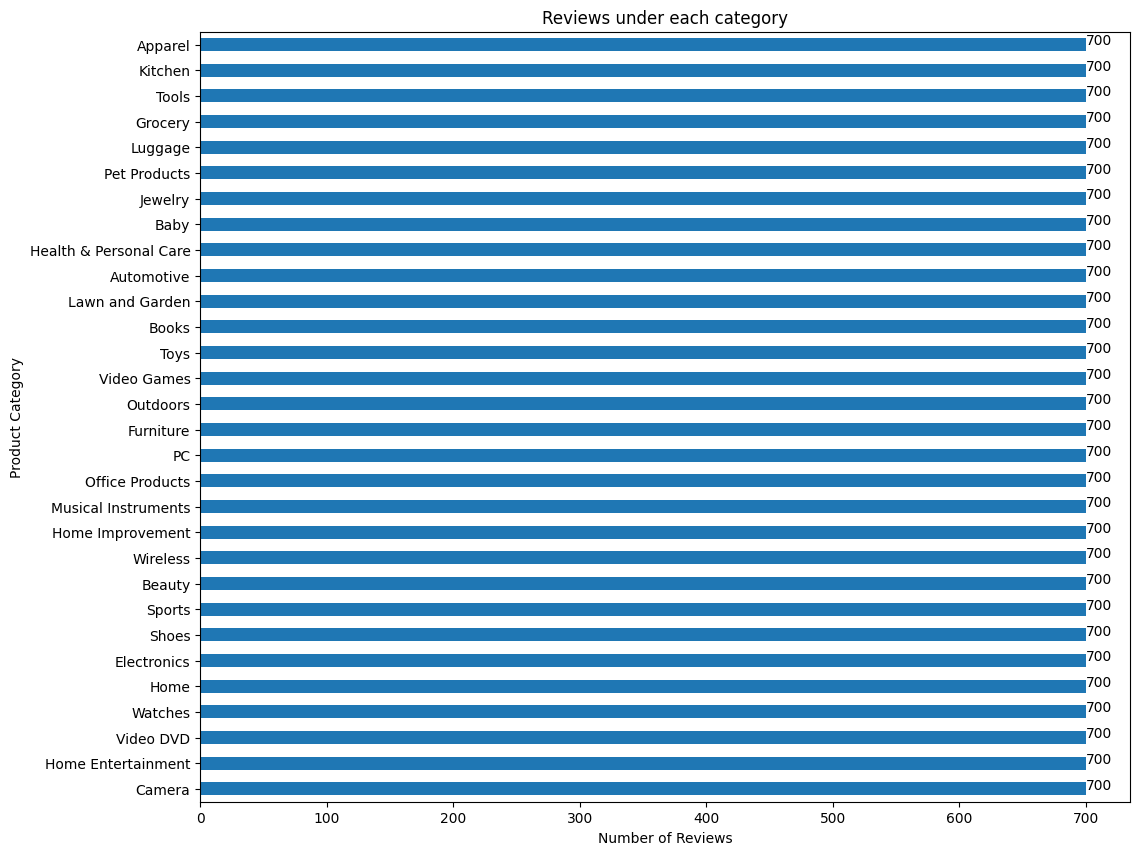

In [12]:
# Plotting number of reviews under each category
# Ref: https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.title('Reviews under each category')
df['PRODUCT_CATEGORY'].value_counts().plot.barh(figsize = (12, 10))
for index, value in enumerate(df['PRODUCT_CATEGORY'].value_counts()):
    plt.text(value, index, str(value))

Text(0, 0.5, 'Label, Product Category')

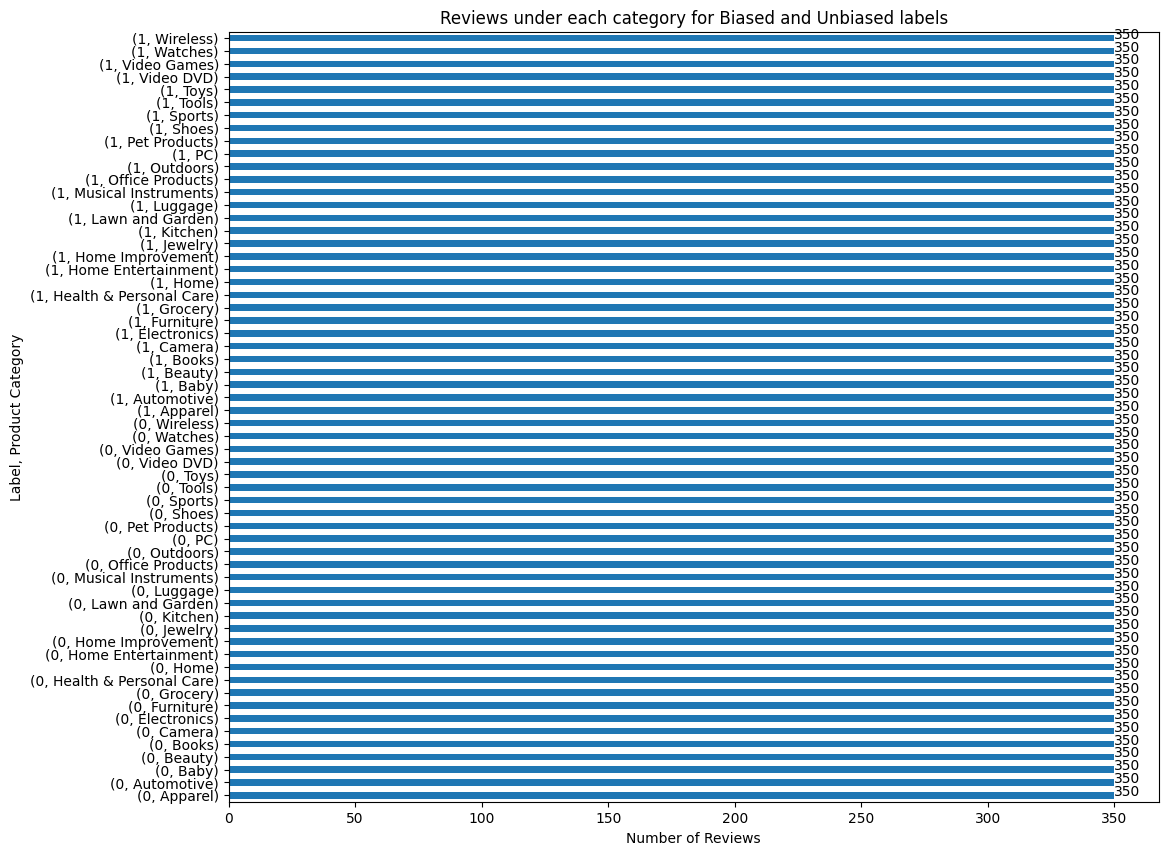

In [13]:
# Plotting number of reviews under each category for each label
# Ref: https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.title('Reviews under each category for Biased and Unbiased labels')
df.groupby(df['LABEL']).PRODUCT_CATEGORY.value_counts().plot.barh(figsize = (12, 10))
for index, value in enumerate(df.groupby(df['LABEL']).PRODUCT_CATEGORY.value_counts()):
    plt.text(value, index, str(value))

plt.ylabel('Label, Product Category')

In [14]:
df.RATING.value_counts()

5    12210
4     3973
3     1868
1     1757
2     1192
Name: RATING, dtype: int64

In [15]:
df.groupby(df['LABEL']).RATING.value_counts()

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

Text(0, 0.5, 'Label, Rating')

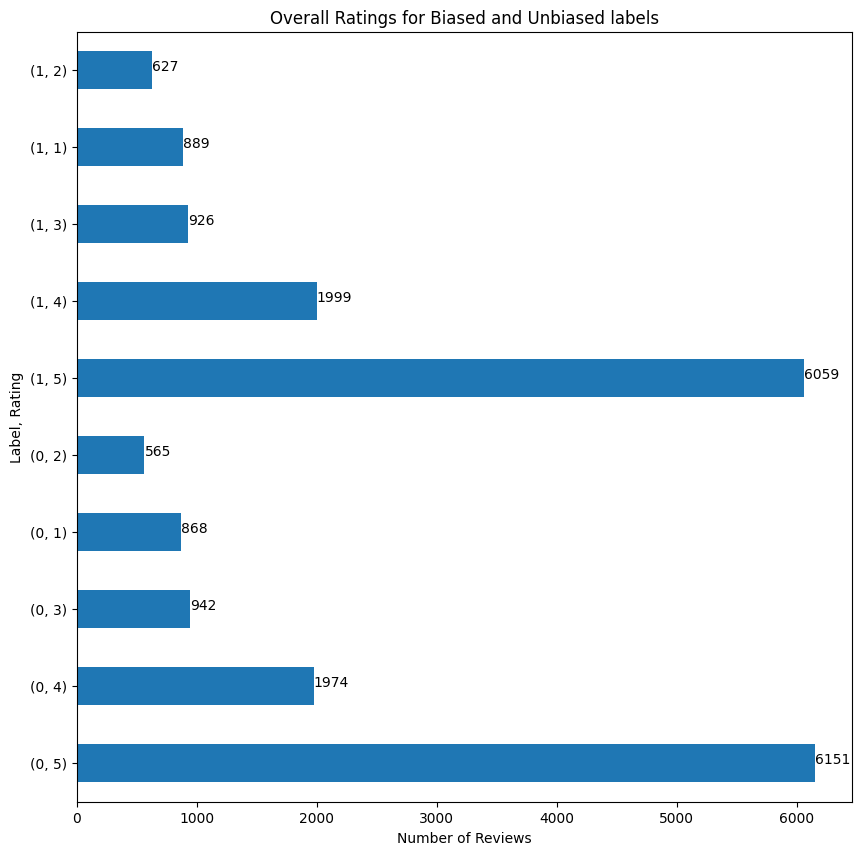

In [16]:
# Plotting number of reviews under each category for each label
# Ref: https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.title('Overall Ratings for Biased and Unbiased labels')
df.groupby(df['LABEL']).RATING.value_counts().plot.barh(figsize = (10,10))
for index, value in enumerate(df.groupby(df['LABEL']).RATING.value_counts()):
    plt.text(value, index, str(value))

plt.ylabel('Label, Rating')

In [17]:
df

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...
...,...,...,...,...,...,...,...,...,...
20995,20996,0,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ..."
20996,20997,0,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...
20997,20998,0,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...
20998,20999,0,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...


In [18]:
df.shape

(21000, 9)

**Data Cleaning**

In [19]:
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
# Function to clean the review text. Converting to lower case, square brackets, extra spaces, URLs, html tags, removing punctuation, new line, words containing numbers and special characters

def cleantext(text):
    # Converting to lower case
    text = text.lower()
    # removing URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # removing mentions
    text = re.sub('@\S+', '', text)
    # removing hashtags
    text = re.sub('#\S+', '', text)
    # removing punctuations
    text = re.sub('[^-9A-Za-z ]', ' ' , text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\W",' ',text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[‘’“”…]', '', text)
    # removing new line
    text = re.sub('\n', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # removing single characters
    text = re.sub('\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub('\^[a-zA-Z]\s+', ' ', text)
    # removing overspaces
    text = re.sub('\s+', ' ', text) 
    return text

In [21]:
df['CLEAN_REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(cleantext)

In [22]:
df['CLEAN_PRODUCT_TITLE'] = df['PRODUCT_TITLE'].apply(cleantext)

In [23]:
df['CLEAN_REVIEW_TITLE'] = df['REVIEW_TITLE'].apply(cleantext)

In [24]:
# Remove emojis
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [25]:
df['CLEAN_REVIEW_TEXT'] = df['CLEAN_REVIEW_TEXT'].apply(lambda x: remove_emoji(x))

In [26]:
df['CLEAN_PRODUCT_TITLE'] = df['CLEAN_PRODUCT_TITLE'].apply(lambda x: remove_emoji(x))

In [27]:
df['CLEAN_REVIEW_TITLE'] = df['CLEAN_REVIEW_TITLE'].apply(lambda x: remove_emoji(x))

In [28]:
# Remove stopwords

#df['CLEAN_REVIEW_TEXT'] = df['CLEAN_REVIEW_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [30]:
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",when least you think so this product will save...,targus pauk ultra mini usb keypad black,useful
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,lithium batteries are something new introduced...,note battery stalion strength replacement mah ...,new era for batteries
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,i purchased this swing for my baby she is mont...,fisher price papasan cradle swing starlight,doesn swing very well
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,i was looking for an inexpensive desk calcolat...,casio ms standard function desktop calculator,great computing
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,i only use it twice week and the results are g...,shine whitening zero peroxide teeth whitening ...,only use twice week


In [31]:
df_copy = df.copy()

In [32]:
# Dropping unused columns

df = df.drop(["DOC_ID", "PRODUCT_ID", "PRODUCT_TITLE", "REVIEW_TITLE","REVIEW_TEXT"], axis=1)
df.head(2)

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,1,4,N,PC,when least you think so this product will save...,targus pauk ultra mini usb keypad black,useful
1,1,4,Y,Wireless,lithium batteries are something new introduced...,note battery stalion strength replacement mah ...,new era for batteries


**Model Training**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
# Split the dataset

x_train, x_test, y_train, y_test = train_test_split(df.drop("LABEL", axis=1), df["LABEL"], test_size=0.2, random_state=1)

In [35]:
x_train.head(2)

,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
16106,5,Y,Watches,great watch with nice contrast between the bla...,timex women t expedition field burnt sienna le...,great watch with nice contrast between the bla...
10729,4,N,Office Products,we are on our second of these printers the fir...,lexmark n mfp color laser ppm s f frnt pic bridge,good laser printer with true to life color


In [36]:
X_train_text = x_train['CLEAN_REVIEW_TEXT'] + x_train['CLEAN_PRODUCT_TITLE'] + x_train['CLEAN_REVIEW_TITLE']
X_train_rating = np.array(x_train['RATING'])
X_train_verified = np.array(x_train['VERIFIED_PURCHASE'])
X_train_pcat = np.array(x_train['PRODUCT_CATEGORY'])

In [37]:
X_test_text = x_test['CLEAN_REVIEW_TEXT'] + x_test['CLEAN_PRODUCT_TITLE'] + x_test['CLEAN_REVIEW_TITLE']
X_test_rating = np.array(x_test['RATING'])
X_test_verified = np.array(x_test['VERIFIED_PURCHASE'])
X_test_pcat = np.array(x_test['PRODUCT_CATEGORY'])

In [38]:
# Initialize a TfidfVectorizer

vectorization = TfidfVectorizer(stop_words='english')

# Fit and transform train set, transform test set
X_train_text_tfidf = vectorization.fit_transform(X_train_text)
X_test_text_tfidf = vectorization.transform(X_test_text)

**Encoding categorical features as a one-hot numeric array.**

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
ohe_rating = OneHotEncoder()
ohe_verified = OneHotEncoder()
ohe_pcat = OneHotEncoder()

X_train_rating_ohe = ohe_rating.fit_transform(X_train_rating.reshape((-1,1)))
X_test_rating_ohe = ohe_rating.transform(X_test_rating.reshape((-1,1)))

X_train_verified_ohe = ohe_verified.fit_transform(X_train_verified.reshape((-1,1)))
X_test_verified_ohe = ohe_verified.transform(X_test_verified.reshape((-1,1)))

X_train_pcat_ohe = ohe_pcat.fit_transform(X_train_pcat.reshape((-1,1)))
X_test_pcat_ohe = ohe_pcat.transform(X_test_pcat.reshape((-1,1)))

In [41]:
X_train_text_tfidf.shape, X_train_pcat_ohe.shape, X_train_rating_ohe.shape, X_train_verified_ohe.shape

((16800, 48195), (16800, 30), (16800, 5), (16800, 2))

**The hstack() function is used to stack arrays in sequence horizontally (column wise).**

In [42]:
from scipy.sparse import hstack

In [43]:
X_train = hstack((X_train_verified_ohe, X_train_rating_ohe, X_train_pcat_ohe, X_train_text_tfidf))
X_test = hstack((X_test_verified_ohe, X_test_rating_ohe, X_test_pcat_ohe, X_test_text_tfidf))

In [44]:
X_train.shape

(16800, 48232)

**1. Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
pred_lr=LR.predict(X_test)

In [48]:
LR_acc = round(LR.score(X_test, y_test)*100,2)
LR_acc

82.48

In [49]:
# Build confusion matrix

confusion_matrix(y_test,pred_lr, labels=['1','0'])

array([[1731,  401],
       [ 335, 1733]])

In [50]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2068
           1       0.84      0.81      0.82      2132

    accuracy                           0.82      4200
   macro avg       0.82      0.82      0.82      4200
weighted avg       0.83      0.82      0.82      4200



**2. Decision Tree Classification**

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
pred_dt = DT.predict(X_test)

In [54]:
DT_acc = round(DT.score(X_test, y_test)*100,2)
DT_acc

76.88

In [55]:
# Build confusion matrix

confusion_matrix(y_test,pred_dt, labels=['1','0'])

array([[1662,  470],
       [ 501, 1567]])

In [56]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2068
           1       0.77      0.78      0.77      2132

    accuracy                           0.77      4200
   macro avg       0.77      0.77      0.77      4200
weighted avg       0.77      0.77      0.77      4200



**3. Gradient Boosting Classifier**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
pred_gbc = GBC.predict(X_test)

In [60]:
GBC_acc = round(GBC.score(X_test, y_test)*100,2)
GBC_acc

80.36

In [61]:
# Build confusion matrix

confusion_matrix(y_test,pred_gbc, labels=['1','0'])

array([[1610,  522],
       [ 303, 1765]])

In [62]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2068
           1       0.84      0.76      0.80      2132

    accuracy                           0.80      4200
   macro avg       0.81      0.80      0.80      4200
weighted avg       0.81      0.80      0.80      4200



**4. Random Forest Classifier**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
pred_rfc = RFC.predict(X_test)

In [66]:
RFC_acc = round(RFC.score(X_test, y_test)*100,2)
RFC_acc

82.57

In [67]:
# Build confusion matrix

confusion_matrix(y_test,pred_rfc, labels=['1','0'])

array([[1707,  425],
       [ 307, 1761]])

In [68]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2068
           1       0.85      0.80      0.82      2132

    accuracy                           0.83      4200
   macro avg       0.83      0.83      0.83      4200
weighted avg       0.83      0.83      0.83      4200



**5. PassiveAggressiveClassifier**

In [69]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [70]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [71]:
pred_pac = pac.predict(X_test)

In [72]:
pac_acc = round(pac.score(X_test, y_test)*100,2)
pac_acc

78.62

In [73]:
# Build confusion matrix

confusion_matrix(y_test,pred_pac, labels=['1','0'])

array([[1700,  432],
       [ 466, 1602]])

In [74]:
print(classification_report(y_test, pred_pac))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2068
           1       0.78      0.80      0.79      2132

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200



**6. MultinomialNB**

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
nbc = MultinomialNB()
nbc.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
pred_nbc = nbc.predict(X_test)

In [78]:
nbc_acc = round(nbc.score(X_test, y_test)*100,2)
nbc_acc

80.14

In [79]:
# Build confusion matrix

confusion_matrix(y_test,pred_nbc, labels=['1','0'])

array([[1658,  474],
       [ 360, 1708]])

In [80]:
print(classification_report(y_test, pred_nbc))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2068
           1       0.82      0.78      0.80      2132

    accuracy                           0.80      4200
   macro avg       0.80      0.80      0.80      4200
weighted avg       0.80      0.80      0.80      4200



**7. SVM**

In [81]:
from sklearn.svm import LinearSVC

In [82]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [83]:
pred_svc = svc.predict(X_test)

In [84]:

svc_acc = round(svc.score(X_test, y_test)*100,2)
svc_acc

82.67

In [85]:
# Build confusion matrix

confusion_matrix(y_test,pred_svc, labels=['1','0'])

array([[1763,  369],
       [ 359, 1709]])

In [86]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2068
           1       0.83      0.83      0.83      2132

    accuracy                           0.83      4200
   macro avg       0.83      0.83      0.83      4200
weighted avg       0.83      0.83      0.83      4200



**Model Prediction Accuracy**

In [87]:
# Model and accuracy dataframe

acc_df = pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','GradientBoostingClassifier',
                                'RandomForestClassifier','PassiveAggressiveClassifier','MultinomialNB','LinearSVC'],
                       'Accuracy_Score':[LR_acc,DT_acc,GBC_acc,RFC_acc,pac_acc,nbc_acc,svc_acc]})

In [88]:
acc_df

,Model,Accuracy_Score
0,LogisticRegression,82.48
1,DecisionTreeClassifier,76.88
2,GradientBoostingClassifier,80.36
3,RandomForestClassifier,82.57
4,PassiveAggressiveClassifier,78.62
5,MultinomialNB,80.14
6,LinearSVC,82.67


In [89]:
# Saving the dataset into a dataframe from Google Drive

acc_df.to_csv(r'/content/gdrive/MyDrive/DATA 606 - Capstone Project/accuracy_score.csv', index = False)

In [90]:
# Loading the dataset into a dataframe from Google Drive

df_clean = pd.read_csv('/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_clean.csv')

In [91]:
df_clean.head(5)

,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below
1,The 22 Immutable Laws of Marketing,Books,4.0,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome
2,Contact,Books,5.0,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30,this is book about first contact with aliens w...,contact,read the book it good
3,Good Omens,Books,5.0,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11,this is quite possibly the funniest book have ...,good omens,funniest book ever written about the anti christ
4,A Confederacy of Dunces,Books,5.0,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17,the story behind the book is almost better tha...,a confederacy of dunces,a winner that didn last only mothers love rema...


In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898566 entries, 0 to 6898565
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   product_title        object 
 1   product_category     object 
 2   star_rating          float64
 3   verified_purchase    object 
 4   review_headline      object 
 5   review_body          object 
 6   review_date          object 
 7   CLEAN_REVIEW_TEXT    object 
 8   CLEAN_PRODUCT_TITLE  object 
 9   CLEAN_REVIEW_TITLE   object 
dtypes: float64(1), object(9)
memory usage: 526.3+ MB


In [94]:
# Converting the datatype of star_rating from float to int

df_clean.star_rating = df_clean.star_rating.astype(int)

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898566 entries, 0 to 6898565
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   product_title        object
 1   product_category     object
 2   star_rating          int64 
 3   verified_purchase    object
 4   review_headline      object
 5   review_body          object
 6   review_date          object
 7   CLEAN_REVIEW_TEXT    object
 8   CLEAN_PRODUCT_TITLE  object
 9   CLEAN_REVIEW_TITLE   object
dtypes: int64(1), object(9)
memory usage: 526.3+ MB


In [96]:
df_clean.head(5)

,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,The Sandman Vol. 1: Preludes and Nocturnes,Books,4,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below
1,The 22 Immutable Laws of Marketing,Books,4,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome
2,Contact,Books,5,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30,this is book about first contact with aliens w...,contact,read the book it good
3,Good Omens,Books,5,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11,this is quite possibly the funniest book have ...,good omens,funniest book ever written about the anti christ
4,A Confederacy of Dunces,Books,5,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17,the story behind the book is almost better tha...,a confederacy of dunces,a winner that didn last only mothers love rema...


In [97]:
df_clean.isna().sum()

product_title          0
product_category       0
star_rating            0
verified_purchase      0
review_headline        0
review_body            0
review_date            0
CLEAN_REVIEW_TEXT      0
CLEAN_PRODUCT_TITLE    0
CLEAN_REVIEW_TITLE     0
dtype: int64

In [98]:
df_clean.shape

(6898566, 10)

**There are more Product Categories on the Unlabeled Amazon review dataset compared when compared to the Labeled Amazon review dataset. I have used Labeled Amazon review dataset for training, so I have dropped the Product Categories from Unlabeled Amazon review dataset which are not present in Labeled Amazon review dataset.**

In [99]:
df.PRODUCT_CATEGORY.unique()

array(['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty',
       'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture',
       'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books',
       'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes',
       'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden',
       'Pet Products', 'Home Entertainment', 'Musical Instruments',
       'Watches', 'Automotive'], dtype=object)

In [100]:
df_clean.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', 'Pet Products'], dtype=object)

In [101]:
df_clean = df_clean[df_clean['product_category'].isin(df.PRODUCT_CATEGORY.unique())]

In [102]:
df_clean = df_clean.reset_index(drop=True)
df_clean.shape

(2208111, 10)

**I would be predicting if the reviews are biased or unbiased in 2208111 Amazon reviews.**

In [103]:
df_clean.product_category.unique()

array(['Books', 'Video DVD', 'Toys', 'Tools', 'Office Products',
       'Video Games', 'Home Entertainment', 'Electronics', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Health & Personal Care',
       'Grocery', 'Luggage', 'Automotive', 'Furniture', 'Pet Products'],
      dtype=object)

In [104]:
# Saving the dataset into a dataframe from Google Drive

df_clean.to_csv(r'/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_clean_final.csv', index = False)

**Prepping the data for prediction.**

In [105]:
X_new_text = df_clean['CLEAN_REVIEW_TEXT'] + df_clean['CLEAN_PRODUCT_TITLE'] + df_clean['CLEAN_REVIEW_TITLE']
X_new_rating = np.array(df_clean['star_rating'])
X_new_verified = np.array(df_clean['verified_purchase'])
X_new_pcat = np.array(df_clean['product_category'])

In [106]:
X_new_text_tfidf = vectorization.transform(X_new_text)

X_new_rating_ohe = ohe_rating.transform(X_new_rating.reshape((-1,1)))
X_new_verified_ohe = ohe_verified.transform(X_new_verified.reshape((-1,1)))
X_new_pcat_ohe = ohe_pcat.transform(X_new_pcat.reshape((-1,1)))

In [107]:
X_new = hstack((X_new_verified_ohe, X_new_rating_ohe, X_new_pcat_ohe, X_new_text_tfidf))

**Model prediction**

**1. Logistic Regression**

In [108]:
pred_lr=LR.predict(X_new)

In [109]:
df_clean['Logistic_Regression_Pred'] = pred_lr

**2. Decision Tree Classification**

In [110]:
pred_dt = DT.predict(X_new)

In [111]:
df_clean['Decision_Tree_Classification_Pred'] = pred_dt

**3. Gradient Boosting Classifier**

In [112]:
pred_gbc = GBC.predict(X_new)

In [113]:
df_clean['Gradient_Boosting_Classifier_Pred'] = pred_gbc

**4. Random Forest Classifier**

In [114]:
pred_rfc = RFC.predict(X_new)

In [115]:
df_clean['Random_Forest_Classifier_Pred'] = pred_rfc

**5. PassiveAggressiveClassifier**

In [116]:
pred_pac = pac.predict(X_new)

In [117]:
df_clean['PassiveAggressiveClassifier_Pred'] = pred_pac

**6. MultinomialNB**

In [118]:
pred_nbc = nbc.predict(X_new)

In [119]:
df_clean['MultinomialNB_Pred'] = pred_nbc

**7. SVM**

In [120]:
pred_svc = svc.predict(X_new)

In [121]:
df_clean['SVM_Pred'] = pred_svc

**The dataset is updated with prediction from all the models.**

**0 -> Biased review**

**1 -> Unbiased review**

In [122]:
df_clean

,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE,Logistic_Regression_Pred,Decision_Tree_Classification_Pred,Gradient_Boosting_Classifier_Pred,Random_Forest_Classifier_Pred,PassiveAggressiveClassifier_Pred,MultinomialNB_Pred,SVM_Pred
0,The Sandman Vol. 1: Preludes and Nocturnes,Books,4,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below,1,1,1,1,1,1,1
1,The 22 Immutable Laws of Marketing,Books,4,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome,1,1,1,1,1,1,1
2,Contact,Books,5,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30,this is book about first contact with aliens w...,contact,read the book it good,1,1,1,1,1,1,1
3,Good Omens,Books,5,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11,this is quite possibly the funniest book have ...,good omens,funniest book ever written about the anti christ,1,1,1,1,1,1,1
4,A Confederacy of Dunces,Books,5,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17,the story behind the book is almost better tha...,a confederacy of dunces,a winner that didn last only mothers love rema...,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208106,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,5,Y,Five Stars,Excellent,2015-08-31,excellent,amazonbasics backpack for slr dslr cameras and...,five stars,0,0,0,0,0,0,0
2208107,Mad Max: Fury Road [Blu-ray],Video DVD,5,N,Best action film in years,"Incredible movie. The action is otherworldly, ...",2015-08-31,incredible movie the action is otherworldly an...,mad max fury road blu ray,best action film in years,1,1,1,1,1,1,1
2208108,Criminal Minds: Season 8,Video DVD,4,N,review,Adding Blake was the worst casting mistake the...,2015-08-31,adding blake was the worst casting mistake the...,criminal minds season,review,1,1,1,1,0,1,0
2208109,Breaking Bad: The Complete Series,Video DVD,5,Y,Five Stars,"excellent seriess, service quick, on disc 3, i...",2015-08-31,excellent seriess service quick on disc it sti...,breaking bad the complete series,five stars,0,0,0,0,1,0,0


In [123]:
# Saving the dataset into a dataframe from Google Drive

df_clean.to_csv(r'/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_result.csv', index = False)